In [1]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker
%matplotlib inline

import numpy as np
import pandas as pd

In [37]:
enn1a = pd.read_csv("/iris/u/em7/code/editable_nlp/eval/edit_success_20210525.12.05.1621970283_bart-base_cloze_lama_epoch0_ts40000.2021-05-24_20-21-05-594534OozFN")
enn1b = pd.read_csv("/iris/u/em7/code/editable_nlp/eval/edit_success_20210525.12.05.1621972499_bart-base_cloze_lama_epoch0_ts40000.2021-05-24_20-22-06-032574KMDAu")
senn1a = pd.read_csv("/iris/u/em7/code/editable_nlp/eval/edit_success_20210525.12.05.1621969215_bart-base_cloze_lama_split_epoch0_ts40000.2021-05-24_20-21-36-151965uTkCl")
senn5a = pd.read_csv("/iris/u/em7/code/editable_nlp/eval/edit_success_20210525.12.05.1621971288_bart-base_cloze_lama_split_epoch0_ts30000.2021-05-24_21-24-00-204291diZRJ")
senn1b = pd.read_csv("/iris/u/em7/code/editable_nlp/eval/edit_success_20210525.12.05.1621970817_bart-base_cloze_lama_split_epoch0_ts40000.2021-05-24_21-16-25-618252jVDEB")

In [46]:
data = [
    {"data": enn1a, "opts": { "label": "ENN-1 0.01/1", "color": "black", "linewidth": 3} },
#    {"data": enn1b, "opts": { "label": "ENN-1 0.1/1", "color": "gray", "linewidth": 3} },
    {"data": senn1a, "opts": { "label": "SENN-1 0.01/1", "color": "red", "linewidth": 3} },
    {"data": senn5a, "opts": { "label": "SENN-1 0.1/1", "color": "yellow", "linewidth": 3} },
    {"data": senn1b, "opts": { "label": "SENN-5 1/10 @30k", "color": "blue", "linewidth": 3} },
]


In [47]:
spacing = 10
spacing_function = lambda x: int(x /spacing) * spacing
n_vis = 100

for d in data:
    d["data"]['grouping'] = d["data"].edit_number.apply(spacing_function)

In [105]:
# Plot config
# print(matplotlib.rcParams.keys())
matplotlib.rcParams["axes.titlesize"] = 20
matplotlib.rcParams["axes.labelsize"] = 16
matplotlib.rcParams["legend.fontsize"] = 14

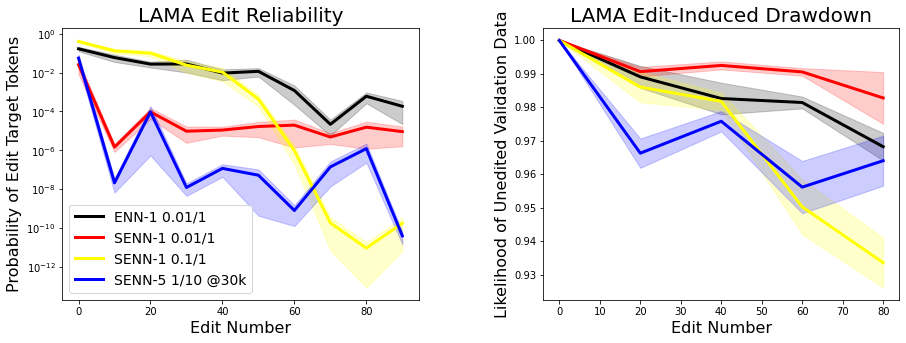

In [107]:
filter_query = f'edit_step == 1 and edit_number < {n_vis}'
mean_exp = lambda x: np.mean(np.exp(x))
sem_exp = lambda x: np.exp(x).std() / x.shape[0]**0.5
def edit_metrics(frame):
    return (
        frame.query(filter_query).groupby("grouping").logits.apply(mean_exp),
        frame.query(filter_query).groupby("grouping").logits.apply(sem_exp)
    )

def drawdown_metrics(frame):
    return (
        frame.loc[~frame.new_lp.isna()].groupby("edit_number").new_lp.apply(mean_exp),
        frame.loc[~frame.new_lp.isna()].groupby("edit_number").new_lp.apply(sem_exp)
    )

fig, ax = plt.subplots(1,2,figsize=(15,5))
for d in data:
    mean, sem = edit_metrics(d["data"])
    ax[0].plot(mean, **d["opts"])
    ax[0].fill_between(mean.index, mean-sem, mean+sem, color=d["opts"]["color"], alpha=0.2)

    mean, sem = drawdown_metrics(d["data"])
    ax[1].plot(mean, **d["opts"])
    ax[1].fill_between(mean.index, mean-sem, mean+sem, color=d["opts"]["color"], alpha=0.2)

ax[0].set_title("LAMA Edit Reliability")
ax[0].set_ylabel("Probability of Edit Target Tokens")
ax[0].set_xlabel("Edit Number")

ax[1].set_title("LAMA Edit-Induced Drawdown")
ax[1].set_ylabel("Likelihood of Unedited Validation Data")
ax[1].set_xlabel("Edit Number")


ax[0].set_yscale("log")
# ax[1].set_yscale("log")

ax[0].legend()
plt.subplots_adjust(wspace=0.35)